## Process and combine data files from RFID and VDM

RFID: Phenosys IDspyder RFID tracking system 

VDM: Columbus Instruments Volumetric Drinking Monitor

Goal of project is to be able to individually track drinking behavior in group housed mice.


In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### RFID data

#### Get paths for files to process

In [2]:
#create list of dir paths
RFID_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m'
    
RFID_file_names = os.listdir(RFID_path)

RFID_data_dir_paths = []

for file in RFID_file_names:
    int_path = RFID_path + '/' + file
    RFID_data_dir_paths.append(int_path)
    
RFID_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.10.02.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.25.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.18.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.15.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.13.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.11.csv']

#### Clean df and combine into 1

In [3]:
data_RFID = pd.DataFrame()

for path in RFID_data_dir_paths:
    print(path)
    
    if path.split('/')[-1] == '.DS_Store':
        continue
        
    #create data table
    data_RFID_int = pd.read_csv(path, sep=';', encoding='utf-16')
    data_RFID_int = pd.DataFrame(data = data_RFID_int)
    data_RFID_int = data_RFID_int.drop([0,1,2,3,4])

    print(data_RFID_int.shape)
    
    #drop rows with no event duration
    data_RFID_int = data_RFID_int[~data_RFID_int['eventDuration'].isna()]
    
    #convert from ms to sec
    data_RFID_int['eventDuration'] = data_RFID_int['eventDuration']/1000
    #clean up and create datetime columns
    data_RFID_int['start_datetime'] = pd.to_datetime(data_RFID_int['DateTime'], unit='d')
    #can't figure out datetime format so hard code for now
    data_RFID_int['RFID_datetime_start'] = [x.replace(year = 2020) - dt.timedelta(days = 2) for x in data_RFID_int['start_datetime']] 
    data_RFID_int['RFID_date'] = data_RFID_int['RFID_datetime_start'].dt.date 
    data_RFID_int['RFID_day'] = data_RFID_int['RFID_datetime_start'].dt.day 
    data_RFID_int['RFID_time_start'] = [x.split(' ')[1] for x in data_RFID_int['RFID_datetime_start'].dt.strftime("%Y-%m-%d %H:%M:%S")]
    data_RFID_int['RFID_hour'] = data_RFID_int['RFID_datetime_start'].dt.hour
    data_RFID_int['RFID_min'] = data_RFID_int['RFID_datetime_start'].dt.minute
    data_RFID_int['RFID_second'] = data_RFID_int['RFID_datetime_start'].dt.second

    if data_RFID.empty:
        data_RFID = data_RFID_int
    else:
        data_RFID = pd.concat([data_RFID, data_RFID_int], axis=0)
        
    print(data_RFID.shape,'\n')

#clean columns
data_RFID = data_RFID[['IdRFID', 'unitLabel', 'eventDuration',
       'RFID_datetime_start', 'RFID_date',
       'RFID_day', 'RFID_time_start', 'RFID_hour', 'RFID_min', 'RFID_second']]
    
data_RFID.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.10.02.csv
(12969, 14)
(12968, 22) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.25.csv
(22276, 14)
(35243, 22) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.18.csv
(16273, 14)
(51515, 22) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.15.csv
(6509, 14)
(58023, 22) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.13.csv
(3845, 14)
(61867, 22) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.11.csv
(5844, 14)
(67710, 22) 



,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second
5,041A555C80,RFID3,2.429,2020-10-04 16:55:14.393020800,2020-10-04,4,16:55:14,16,55,14
6,041A555C80,RFID3,5.377,2020-10-04 16:55:18.607008000,2020-10-04,4,16:55:18,16,55,18
7,041A555C80,RFID4,0.886,2020-10-04 16:55:27.989011200,2020-10-04,4,16:55:27,16,55,27
8,041A555C80,RFID4,0.342,2020-10-04 16:55:29.962041599,2020-10-04,4,16:55:29,16,55,29
9,041A555C80,RFID2,0.445,2020-10-04 16:55:39.057974400,2020-10-04,4,16:55:39,16,55,39


#### Compute end time

In [4]:
#compute end time for each eventDuration
def add_duration(a, b):
    newtime = a + dt.timedelta(0, b)

    return newtime

data_RFID['RFID_datetime_end'] = data_RFID.apply(lambda row: add_duration(row['RFID_datetime_start'], row['eventDuration']), axis=1)
data_RFID['RFID_time_end'] = [x.split(' ')[1] for x in data_RFID['RFID_datetime_end'].dt.strftime("%Y-%m-%d %H:%M:%S")]

print(data_RFID.shape)
data_RFID.head()

(67710, 12)


,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end
5,041A555C80,RFID3,2.429,2020-10-04 16:55:14.393020800,2020-10-04,4,16:55:14,16,55,14,2020-10-04 16:55:16.822020800,16:55:16
6,041A555C80,RFID3,5.377,2020-10-04 16:55:18.607008000,2020-10-04,4,16:55:18,16,55,18,2020-10-04 16:55:23.984008000,16:55:23
7,041A555C80,RFID4,0.886,2020-10-04 16:55:27.989011200,2020-10-04,4,16:55:27,16,55,27,2020-10-04 16:55:28.875011200,16:55:28
8,041A555C80,RFID4,0.342,2020-10-04 16:55:29.962041599,2020-10-04,4,16:55:29,16,55,29,2020-10-04 16:55:30.304041599,16:55:30
9,041A555C80,RFID2,0.445,2020-10-04 16:55:39.057974400,2020-10-04,4,16:55:39,16,55,39,2020-10-04 16:55:39.502974400,16:55:39


#### Add next column (do for each unitLabel separately)

In [5]:
#column for if next is same Id
def next_compare(a, b):
    if a == b:
        compare = 'same'
        
    if a != b:
        compare = 'diff'

    return compare

data_RFID_next = pd.DataFrame()

for unitlabel in data_RFID['unitLabel'].unique():
    print(unitlabel)

    data_int = data_RFID[data_RFID['unitLabel'] == unitlabel].sort_values(['RFID_datetime_start'])
    data_int['RFID_datetime_start_next'] = data_int['RFID_datetime_start'].shift(-1)
    data_int['IdRFID_next'] = data_int['IdRFID'].shift(-1)
    
    data_int['IdRFID_diff_next'] = data_int.apply(lambda row: next_compare(row['IdRFID'], row['IdRFID_next']), axis=1)

    if data_RFID_next.empty:
        data_RFID_next = data_int
    else:
        data_RFID_next = pd.concat([data_RFID_next, data_int], axis=0)

data_RFID_next['time_diff_next'] = (data_RFID_next['RFID_datetime_start_next'] - data_RFID_next['RFID_datetime_end'])
data_RFID_next['time_diff_next'] = [x.total_seconds() for x in data_RFID_next['time_diff_next']]
data_RFID_next['time_diff_next_round'] = data_RFID_next['time_diff_next'].round(-1)
data_RFID_next.head()

RFID3
RFID4
RFID2
RFID1


,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round
39,041A555BCC,RFID3,1.460,2020-09-11 11:19:42.993004800,2020-09-11,11,11:19:42,11,19,42,2020-09-11 11:19:44.453004800,11:19:44,2020-09-11 11:20:53.106000000,041A555BCC,same,68.652995,70.0
40,041A555BCC,RFID3,4.350,2020-09-11 11:20:53.106000000,2020-09-11,11,11:20:53,11,20,53,2020-09-11 11:20:57.456000000,11:20:57,2020-09-11 11:23:31.367990400,041A555BCC,same,153.911990,150.0
42,041A555BCC,RFID3,4.182,2020-09-11 11:23:31.367990400,2020-09-11,11,11:23:31,11,23,31,2020-09-11 11:23:35.549990400,11:23:35,2020-09-11 11:24:31.229020800,041A555BCC,same,55.679030,60.0
45,041A555BCC,RFID3,0.146,2020-09-11 11:24:31.229020800,2020-09-11,11,11:24:31,11,24,31,2020-09-11 11:24:31.375020800,11:24:31,2020-09-11 11:25:44.756976000,041A555D59,diff,73.381955,70.0
47,041A555D59,RFID3,1.191,2020-09-11 11:25:44.756976000,2020-09-11,11,11:25:44,11,25,44,2020-09-11 11:25:45.947976000,11:25:45,2020-09-11 11:25:49.360022400,041A555D59,same,3.412046,0.0


#### Add day, hour, and min counts

In [6]:
#column of running day count
dat_map = {13: 1, 14: 2, 15: 3, 16: 4, 17: 5, 18: 6,
 21: 1, 22: 2, 23: 3, 24: 4, 25: 5,
 28: 1, 29: 2, 30: 3, 1: 4, 2: 5,
 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9:6}
data_RFID_next['RFID_day_count'] = data_RFID_next['RFID_day'].map(dat_map)

#column of running min and second count within each day
data_RFID_next['RFID_min_count'] = (data_RFID_next['RFID_hour']*60) + data_RFID_next['RFID_min'] 
data_RFID_next['RFID_sec_count'] = (data_RFID_next['RFID_min_count']*60) + data_RFID_next['RFID_second'] 

#column of running hour and minute count across all days
data_RFID_next['RFID_hour_count_running'] = (data_RFID_next['RFID_day_count']*24) + data_RFID_next['RFID_hour'] - 24
data_RFID_next['RFID_min_count_running'] = (data_RFID_next['RFID_hour_count_running']*60) + data_RFID_next['RFID_min'] 
data_RFID_next['RFID_sec_count_running'] = (data_RFID_next['RFID_min_count_running']*60) + data_RFID_next['RFID_second'] - 60

print(data_RFID_next.shape)
data_RFID_next.head()

(67710, 23)


,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running
39,041A555BCC,RFID3,1.460,2020-09-11 11:19:42.993004800,2020-09-11,11,11:19:42,11,19,42,2020-09-11 11:19:44.453004800,11:19:44,2020-09-11 11:20:53.106000000,041A555BCC,same,68.652995,70.0,NaN,679,40782,NaN,NaN,NaN
40,041A555BCC,RFID3,4.350,2020-09-11 11:20:53.106000000,2020-09-11,11,11:20:53,11,20,53,2020-09-11 11:20:57.456000000,11:20:57,2020-09-11 11:23:31.367990400,041A555BCC,same,153.911990,150.0,NaN,680,40853,NaN,NaN,NaN
42,041A555BCC,RFID3,4.182,2020-09-11 11:23:31.367990400,2020-09-11,11,11:23:31,11,23,31,2020-09-11 11:23:35.549990400,11:23:35,2020-09-11 11:24:31.229020800,041A555BCC,same,55.679030,60.0,NaN,683,41011,NaN,NaN,NaN
45,041A555BCC,RFID3,0.146,2020-09-11 11:24:31.229020800,2020-09-11,11,11:24:31,11,24,31,2020-09-11 11:24:31.375020800,11:24:31,2020-09-11 11:25:44.756976000,041A555D59,diff,73.381955,70.0,NaN,684,41071,NaN,NaN,NaN
47,041A555D59,RFID3,1.191,2020-09-11 11:25:44.756976000,2020-09-11,11,11:25:44,11,25,44,2020-09-11 11:25:45.947976000,11:25:45,2020-09-11 11:25:49.360022400,041A555D59,same,3.412046,0.0,NaN,685,41144,NaN,NaN,NaN


#### Add light dark

In [7]:
def assign_ld(time):
    if (time >= 6) & (time < 18):
        return 'light'
    if (time >= 0) & (time < 6):
        return 'dark_am'
    if (time >= 18):
        return 'dark_pm'
    
data_RFID_next['ld_seg'] = data_RFID_next['RFID_hour'].apply(assign_ld)

print(data_RFID_next.shape)
data_RFID_next.head()


(67710, 24)


,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg
39,041A555BCC,RFID3,1.460,2020-09-11 11:19:42.993004800,2020-09-11,11,11:19:42,11,19,42,2020-09-11 11:19:44.453004800,11:19:44,2020-09-11 11:20:53.106000000,041A555BCC,same,68.652995,70.0,NaN,679,40782,NaN,NaN,NaN,light
40,041A555BCC,RFID3,4.350,2020-09-11 11:20:53.106000000,2020-09-11,11,11:20:53,11,20,53,2020-09-11 11:20:57.456000000,11:20:57,2020-09-11 11:23:31.367990400,041A555BCC,same,153.911990,150.0,NaN,680,40853,NaN,NaN,NaN,light
42,041A555BCC,RFID3,4.182,2020-09-11 11:23:31.367990400,2020-09-11,11,11:23:31,11,23,31,2020-09-11 11:23:35.549990400,11:23:35,2020-09-11 11:24:31.229020800,041A555BCC,same,55.679030,60.0,NaN,683,41011,NaN,NaN,NaN,light
45,041A555BCC,RFID3,0.146,2020-09-11 11:24:31.229020800,2020-09-11,11,11:24:31,11,24,31,2020-09-11 11:24:31.375020800,11:24:31,2020-09-11 11:25:44.756976000,041A555D59,diff,73.381955,70.0,NaN,684,41071,NaN,NaN,NaN,light
47,041A555D59,RFID3,1.191,2020-09-11 11:25:44.756976000,2020-09-11,11,11:25:44,11,25,44,2020-09-11 11:25:45.947976000,11:25:45,2020-09-11 11:25:49.360022400,041A555D59,same,3.412046,0.0,NaN,685,41144,NaN,NaN,NaN,light


In [8]:
ld_mapping_path = '/Users/abbieschindler/Documents/ProgrammingFun/iPythonScripts/ld_mapping.xlsx'

ld_mapping = pd.read_excel(ld_mapping_path)
ld_mapping = pd.DataFrame(data = ld_mapping)
print(ld_mapping.shape)
ld_mapping.head()

(89, 3)


,day,ld_seg,ld
0,2,dark_am,dark_night1
1,3,dark_am,dark_night2
2,4,dark_am,dark_night3
3,5,dark_am,dark_night4
4,6,dark_am,dark_night5


In [9]:
#also filters out the water only days
data_RFID_next = data_RFID_next.merge(ld_mapping, right_on=['day', 'ld_seg'], left_on=['RFID_day_count', 'ld_seg'])
print(data_RFID_next.shape)
data_RFID_next.head()

(48510, 26)


,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg,day,ld
0,041A555D59,RFID3,0.083,2020-09-13 06:03:08.850960000,2020-09-13,13,06:03:08,6,3,8,2020-09-13 06:03:08.933960000,06:03:08,2020-09-13 06:03:11.386022400,041A555D59,same,2.452062,0.0,1.0,363,21788,6.0,363.0,21728.0,light,1,light_day1
1,041A555D59,RFID3,1.288,2020-09-13 06:03:11.386022400,2020-09-13,13,06:03:11,6,3,11,2020-09-13 06:03:12.674022400,06:03:12,2020-09-13 06:03:14.278003200,041A555D59,same,1.603980,0.0,1.0,363,21791,6.0,363.0,21731.0,light,1,light_day1
2,041A555D59,RFID3,2.790,2020-09-13 06:03:14.278003200,2020-09-13,13,06:03:14,6,3,14,2020-09-13 06:03:17.068003200,06:03:17,2020-09-13 06:04:41.881036800,041A555BCC,diff,84.813033,80.0,1.0,363,21794,6.0,363.0,21734.0,light,1,light_day1
3,041A555BCC,RFID3,3.704,2020-09-13 06:04:41.881036800,2020-09-13,13,06:04:41,6,4,41,2020-09-13 06:04:45.585036800,06:04:45,2020-09-13 06:04:46.698960000,041A555BCC,same,1.113923,0.0,1.0,364,21881,6.0,364.0,21821.0,light,1,light_day1
4,041A555BCC,RFID3,0.229,2020-09-13 06:04:46.698960000,2020-09-13,13,06:04:46,6,4,46,2020-09-13 06:04:46.927960000,06:04:46,2020-09-13 06:06:45.769996800,041A555D59,diff,118.842036,120.0,1.0,364,21886,6.0,364.0,21826.0,light,1,light_day1


#### Map unitLabel and bottle contents

In [10]:
unitLabel_map = {'RFID1': 'RFID_EtOH10',
                 'RFID2': 'RFID_EtOH05',
                 'RFID3': 'RFID_EtOH20',
                 'RFID4': 'RFID_H20'}

data_RFID_next['unitLabel_drink'] = data_RFID_next['unitLabel'].map(unitLabel_map)
print(data_RFID_next.shape)

(48510, 27)


#### Add metadata and clean

In [11]:
meta_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID_meta_data.xlsx'
meta_data = pd.read_excel(meta_path)
meta_data = pd.DataFrame(data = meta_data)

data_RFID_final = meta_data.merge(data_RFID_next.reset_index(), on='IdRFID', sort=False)

print(data_RFID_final.shape)
data_RFID_final.head()

(48510, 43)


,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,IdRFID,weight_pre,weight_post,weight_diff,notes,wes_day,wd_day,r_day,index,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg,day,ld,unitLabel_drink
0,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,0,RFID3,0.083,2020-09-13 06:03:08.850960000,2020-09-13,13,06:03:08,6,3,8,2020-09-13 06:03:08.933960000,06:03:08,2020-09-13 06:03:11.386022400,041A555D59,same,2.452062,0.0,1.0,363,21788,6.0,363.0,21728.0,light,1,light_day1,RFID_EtOH20
1,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,1,RFID3,1.288,2020-09-13 06:03:11.386022400,2020-09-13,13,06:03:11,6,3,11,2020-09-13 06:03:12.674022400,06:03:12,2020-09-13 06:03:14.278003200,041A555D59,same,1.603980,0.0,1.0,363,21791,6.0,363.0,21731.0,light,1,light_day1,RFID_EtOH20
2,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2,RFID3,2.790,2020-09-13 06:03:14.278003200,2020-09-13,13,06:03:14,6,3,14,2020-09-13 06:03:17.068003200,06:03:17,2020-09-13 06:04:41.881036800,041A555BCC,diff,84.813033,80.0,1.0,363,21794,6.0,363.0,21734.0,light,1,light_day1,RFID_EtOH20
3,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,5,RFID3,0.075,2020-09-13 06:06:45.769996800,2020-09-13,13,06:06:45,6,6,45,2020-09-13 06:06:45.844996800,06:06:45,2020-09-13 06:06:47.055024000,041A555D59,same,1.210027,0.0,1.0,366,22005,6.0,366.0,21945.0,light,1,light_day1,RFID_EtOH20
4,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,6,RFID3,18.496,2020-09-13 06:06:47.055024000,2020-09-13,13,06:06:47,6,6,47,2020-09-13 06:07:05.551024000,06:07:05,2020-09-13 06:07:07.237977600,041A555D59,same,1.686953,0.0,1.0,366,22007,6.0,366.0,21947.0,light,1,light_day1,RFID_EtOH20


#### Map water vs. ethanol based on wes_day column from meta data - use to filter out when only water in cages

In [12]:
def we_switch(x,y):
    if x < y:
        return 'water'
    if x > y:
        return 'etoh'
    
data_RFID_final['wes_drink'] = data_RFID_final.apply(lambda row: we_switch(row['RFID_datetime_start'], row['wes_day']), axis=1)


In [13]:
print(data_RFID_final.shape)
data_RFID_final = data_RFID_final[data_RFID_final['wes_drink']=='etoh']
print(data_RFID_final.shape)

(48510, 44)
(45156, 44)


In [14]:
data_RFID_final = data_RFID_final[['Round', 'Round_info', 'Sub_round', 'Timepoint', 'Cage_N', 'Cage', 'Animal',
                                   'Injury', 'IdRFID', 'weight_pre', 'weight_post', 'weight_diff', 
                                   'notes', 'wes_day', 'wd_day', 'r_day',
                                   'unitLabel', 'unitLabel_drink', 'eventDuration',
                                   'RFID_datetime_start', 'RFID_datetime_end',
                                   'RFID_datetime_start_next', 'IdRFID_next', 
                                   'IdRFID_diff_next', 'time_diff_next', 'time_diff_next_round', 
                                   'RFID_time_start', 'RFID_time_end',
                                   'RFID_date', 'RFID_day', 'ld', 'ld_seg', 'RFID_day_count',
                                   'RFID_hour', 'RFID_min', 'RFID_second',
                                   'RFID_min_count', 'RFID_sec_count',
                                   'RFID_hour_count_running', 'RFID_min_count_running', 'RFID_sec_count_running']]

print(data_RFID_final.shape)
data_RFID_final.head()

(45156, 41)


,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,IdRFID,weight_pre,weight_post,weight_diff,notes,wes_day,wd_day,r_day,unitLabel,unitLabel_drink,eventDuration,RFID_datetime_start,RFID_datetime_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_time_start,RFID_time_end,RFID_date,RFID_day,ld,ld_seg,RFID_day_count,RFID_hour,RFID_min,RFID_second,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running
386,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,RFID3,RFID_EtOH20,1.331,2020-09-13 18:14:58.835011200,2020-09-13 18:15:00.166011200,2020-09-13 18:15:01.918022400,041A555D59,same,1.752011,0.0,18:14:58,18:15:00,2020-09-13,13,dark_night1,dark_pm,1.0,18,14,58,1094,65698,18.0,1094.0,65638.0
387,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,RFID3,RFID_EtOH20,2.656,2020-09-13 18:15:01.918022400,2020-09-13 18:15:04.574022400,2020-09-13 18:15:07.055020800,041A555D59,same,2.480998,0.0,18:15:01,18:15:04,2020-09-13,13,dark_night1,dark_pm,1.0,18,15,1,1095,65701,18.0,1095.0,65641.0
388,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,RFID3,RFID_EtOH20,1.385,2020-09-13 18:15:07.055020800,2020-09-13 18:15:08.440020800,2020-09-13 18:16:35.653036800,041A555D59,same,87.213016,90.0,18:15:07,18:15:08,2020-09-13,13,dark_night1,dark_pm,1.0,18,15,7,1095,65707,18.0,1095.0,65647.0
389,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,RFID3,RFID_EtOH20,3.794,2020-09-13 18:16:35.653036800,2020-09-13 18:16:39.447036800,2020-09-13 18:16:40.560988800,041A555D59,same,1.113952,0.0,18:16:35,18:16:39,2020-09-13,13,dark_night1,dark_pm,1.0,18,16,35,1096,65795,18.0,1096.0,65735.0
390,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,RFID3,RFID_EtOH20,0.115,2020-09-13 18:16:40.560988800,2020-09-13 18:16:40.675988800,2020-09-13 18:46:41.251987199,041A555BCC,diff,1800.575998,1800.0,18:16:40,18:16:40,2020-09-13,13,dark_night1,dark_pm,1.0,18,16,40,1096,65800,18.0,1096.0,65740.0


#### Viz

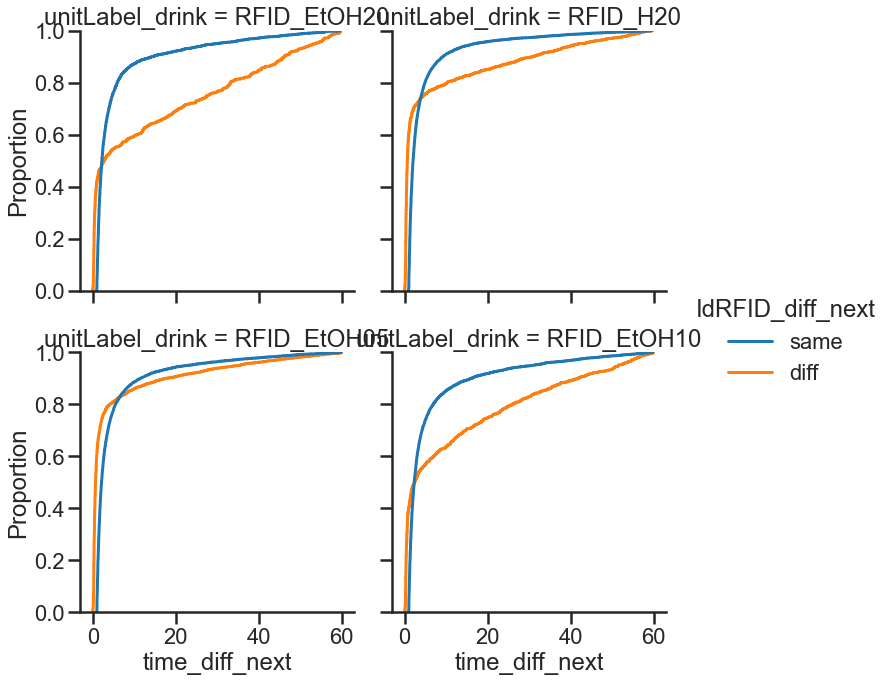

In [15]:
data_int = data_RFID_final[data_RFID_final['time_diff_next'] < 60]
sns.displot(data=data_int, x="time_diff_next", hue="IdRFID_diff_next", kind="ecdf", col="unitLabel_drink", col_wrap=2)
plt.show()

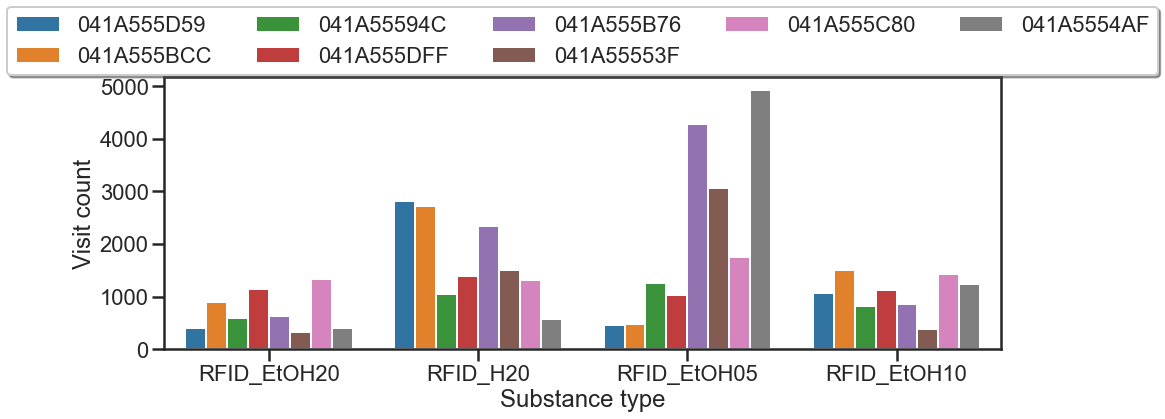

In [16]:
#data_int = data_RFID_final[data_RFID_final['RFID_day_count'] < 8]
plt.figure(figsize=(15,5))
sns.countplot(data=data_RFID_final, x="unitLabel_drink", hue="IdRFID")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=5, fancybox=True, shadow=True)
plt.xlabel('Substance type')
plt.ylabel('Visit count')
plt.show()

### VDM data

#### Get paths for files to process

In [17]:
#create list of dir paths

VDM_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m'

VDM_file_names = os.listdir(VDM_path)

VDM_data_dir_paths = []

for file in VDM_file_names:
    int_path = VDM_path + '/' + file
    VDM_data_dir_paths.append(int_path)

VDM_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/.DS_Store',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200928.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200913.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.201004.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200921.1m.csv']

#### Clean df and combine into 1

In [18]:
data_VDM = pd.DataFrame()

for path in VDM_data_dir_paths:
    print(path)
    
    if path.split('/')[-1] == '.DS_Store':
        continue
        
    
    data_VDM_int = pd.read_csv(path)
    data_VDM_int = pd.DataFrame(data = data_VDM_int)
    print(data_VDM_int.shape)
    
    #add info from file name
    data_VDM_int['Cohort'] = path.split('/')[-2].split('.')[0]
    data_VDM_int['TP'] = path.split('/')[-2].split('.')[1]
    data_VDM_int['StartDate'] = path.split('/')[-1].split('.')[1]
    
    if data_VDM.empty:
        data_VDM = data_VDM_int
    else:
        data_VDM = pd.concat([data_VDM, data_VDM_int], axis=0)
        
    print(data_VDM.shape,'\n')
    
data_VDM.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/.DS_Store
/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200928.1m.csv
(423774, 11)
(423774, 14) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200913.1m.csv
(533853, 11)
(957627, 14) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.201004.1m.csv
(511519, 11)
(1469146, 14) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200921.1m.csv
(440884, 11)
(1910030, 14) 



,Int,Cage,Time,Drinking (ml),Drinking Accum (ml),Drinking (ml).1,Drinking Accum (ml).1,Drinking (ml).2,Drinking Accum (ml).2,Drinking (ml).3,Drinking Accum (ml).3,Cohort,TP,StartDate
0,0,1,9/28/20 17:25,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,r1,1m,200928
1,0,2,9/28/20 17:25,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,r1,1m,200928
2,1,1,9/28/20 17:25,0.0,0.0,0.05,0.05,0.0,0.0,0.00,0.00,r1,1m,200928
3,1,2,9/28/20 17:25,0.0,0.0,0.00,0.00,0.0,0.0,0.04,0.04,r1,1m,200928
4,2,1,9/28/20 17:25,0.0,0.0,0.00,0.05,0.0,0.0,0.00,0.00,r1,1m,200928


#### Clean up column names

In [19]:
data_VDM.columns = ['Int', 'Cage_VDM', 'VDM_Time', 
                    'VDM_EtOH10', 'VDM_EtOH10_accum',
                    'VDM_EtOH05', 'VDM_EtOH05_accum', 
                    'VDM_EtOH20', 'VDM_EtOH20_accum', 
                    'VDM_H20', 'VDM_H20_accum', 
                    'Cohort', 'TP', 'StartDate']

data_VDM = data_VDM[['Cage_VDM', 'Cohort', 'TP', 'StartDate', 'VDM_Time', 'VDM_EtOH05', 'VDM_EtOH10', 'VDM_EtOH20', 'VDM_H20']]

print(data_VDM.shape)
data_VDM.tail()

(1910030, 9)


,Cage_VDM,Cohort,TP,StartDate,VDM_Time,VDM_EtOH05,VDM_EtOH10,VDM_EtOH20,VDM_H20
440879,2,r1,1m,200921,09/25/20 13:32:04,0.0,0.0,0.0,0.0
440880,1,r1,1m,200921,09/25/20 13:32:05,0.0,0.0,0.0,0.0
440881,2,r1,1m,200921,09/25/20 13:32:05,0.0,0.0,0.0,0.0
440882,1,r1,1m,200921,09/25/20 13:32:07,0.0,0.0,0.0,0.0
440883,2,r1,1m,200921,09/25/20 13:32:07,0.0,0.0,0.0,0.0


#### Convert liquid vol to etoh vol

In [20]:
data_VDM['VDM_EtOH10'] = data_VDM['VDM_EtOH10'].astype('float')
data_VDM['VDM_EtOH20'] = data_VDM['VDM_EtOH20'].astype('float')
data_VDM['VDM_EtOH05'] = data_VDM['VDM_EtOH05'].astype('float')
data_VDM['VDM_H20'] = data_VDM['VDM_H20'].astype('float')

#### Make into tidy df

In [21]:
#melt dataframe (new column of parameters)

meta_params = ['Cage_VDM', 'Cohort', 'TP', 'StartDate', 'VDM_Time']
intake_params = ['VDM_EtOH05', 'VDM_EtOH10', 'VDM_EtOH20', 'VDM_H20']

data_VDM_tidy = pd.melt(data_VDM, id_vars=meta_params, value_vars=intake_params)

print(data_VDM_tidy.shape)
data_VDM_tidy.head()

(7640120, 7)


,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value
0,1,r1,1m,200928,9/28/20 17:25,VDM_EtOH05,0.00
1,2,r1,1m,200928,9/28/20 17:25,VDM_EtOH05,0.00
2,1,r1,1m,200928,9/28/20 17:25,VDM_EtOH05,0.05
3,2,r1,1m,200928,9/28/20 17:25,VDM_EtOH05,0.00
4,1,r1,1m,200928,9/28/20 17:25,VDM_EtOH05,0.00


#### Drop times with no intake data

In [22]:
data_VDM_tidy_intake = data_VDM_tidy[data_VDM_tidy['value'] > 0]
print(data_VDM_tidy_intake.shape)

(7635, 7)


#### Clean up datetime

In [23]:
#clean up and create datetime columns
data_VDM_tidy_intake['VDM_datetime'] = pd.to_datetime(data_VDM_tidy_intake['VDM_Time'])
data_VDM_tidy_intake['VDM_timestamp'] = [x.timestamp() for x in data_VDM_tidy_intake['VDM_datetime']]

data_VDM_tidy_intake['VDM_date'] = data_VDM_tidy_intake['VDM_datetime'].dt.date
data_VDM_tidy_intake['VDM_day'] = data_VDM_tidy_intake['VDM_datetime'].dt.day
data_VDM_tidy_intake['VDM_time'] = data_VDM_tidy_intake['VDM_datetime'].dt.strftime("%H:%M:%S")
data_VDM_tidy_intake['VDM_hour'] = data_VDM_tidy_intake['VDM_datetime'].dt.hour
data_VDM_tidy_intake['VDM_min'] = data_VDM_tidy_intake['VDM_datetime'].dt.minute
data_VDM_tidy_intake['VDM_second'] = data_VDM_tidy_intake['VDM_datetime'].dt.second

print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(7635, 15)


,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second
2,1,r1,1m,200928,9/28/20 17:25,VDM_EtOH05,0.050,2020-09-28 17:25:00,1.601314e+09,2020-09-28,28,17:25:00,17,25,0
15529,2,r1,1m,200928,9/28/20 20:51,VDM_EtOH05,0.022,2020-09-28 20:51:00,1.601326e+09,2020-09-28,28,20:51:00,20,51,0
15533,2,r1,1m,200928,9/28/20 20:51,VDM_EtOH05,0.022,2020-09-28 20:51:00,1.601326e+09,2020-09-28,28,20:51:00,20,51,0
15537,2,r1,1m,200928,9/28/20 20:51,VDM_EtOH05,0.022,2020-09-28 20:51:00,1.601326e+09,2020-09-28,28,20:51:00,20,51,0
15625,2,r1,1m,200928,9/28/20 20:52,VDM_EtOH05,0.022,2020-09-28 20:52:00,1.601326e+09,2020-09-28,28,20:52:00,20,52,0


#### Add light dark and clean

In [24]:
def assign_ld(time):
    if (time >= 6) & (time < 18):
        return 'light'
    if (time >= 0) & (time < 6):
        return 'dark_am'
    if (time >= 18):
        return 'dark_pm'
    
data_VDM_tidy_intake['ld_seg'] = data_VDM_tidy_intake['VDM_hour'].apply(assign_ld)

print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(7635, 16)


,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg
2,1,r1,1m,200928,9/28/20 17:25,VDM_EtOH05,0.050,2020-09-28 17:25:00,1.601314e+09,2020-09-28,28,17:25:00,17,25,0,light
15529,2,r1,1m,200928,9/28/20 20:51,VDM_EtOH05,0.022,2020-09-28 20:51:00,1.601326e+09,2020-09-28,28,20:51:00,20,51,0,dark_pm
15533,2,r1,1m,200928,9/28/20 20:51,VDM_EtOH05,0.022,2020-09-28 20:51:00,1.601326e+09,2020-09-28,28,20:51:00,20,51,0,dark_pm
15537,2,r1,1m,200928,9/28/20 20:51,VDM_EtOH05,0.022,2020-09-28 20:51:00,1.601326e+09,2020-09-28,28,20:51:00,20,51,0,dark_pm
15625,2,r1,1m,200928,9/28/20 20:52,VDM_EtOH05,0.022,2020-09-28 20:52:00,1.601326e+09,2020-09-28,28,20:52:00,20,52,0,dark_pm


#### Map water/etoh switch and filter

In [25]:
data_VDM_tidy_intake.groupby(['StartDate'])['VDM_date'].value_counts()

StartDate  VDM_date  
200913     2020-09-14    738
           2020-09-17    700
           2020-09-16    688
           2020-09-15    677
           2020-09-18    350
           2020-09-13    194
200921     2020-09-22    329
           2020-09-24    312
           2020-09-23    280
           2020-09-25    179
           2020-09-21    142
200928     2020-09-29    364
           2020-10-01    358
           2020-09-30    348
           2020-10-02    202
           2020-09-28    140
201004     2020-10-08    355
           2020-10-06    354
           2020-10-05    331
           2020-10-07    326
           2020-10-09    168
           2020-10-04    100
Name: VDM_date, dtype: int64

In [26]:
we_mapping_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/water_etoh_switch.xlsx'

we_mapping = pd.read_excel(we_mapping_path)
we_mapping = pd.DataFrame(data = we_mapping)
we_mapping['StartDate'] = we_mapping['StartDate'].astype('str')
print(we_mapping.shape)
we_mapping.head()

(4, 2)


,we_switch,StartDate
0,2020-09-13 17:08:27,200913
1,2020-09-21 12:02:50,200921
2,2020-09-28 17:25:00,200928
3,2020-10-04 16:54:00,201004


In [27]:
print(data_VDM_tidy_intake.shape)

data_VDM_tidy_intake = we_mapping.merge(data_VDM_tidy_intake, on='StartDate')

def we_switch(x,y):
    if x <= y:
        return 'water'
    if x > y:
        return 'etoh'
    
data_VDM_tidy_intake['wes_drink'] = data_VDM_tidy_intake.apply(lambda row: we_switch(row['VDM_datetime'], row['we_switch']), axis=1)

data_VDM_tidy_intake = data_VDM_tidy_intake[data_VDM_tidy_intake['wes_drink']=='etoh']
print(data_VDM_tidy_intake.shape)

(7635, 16)
(7633, 18)


### Filter RFID data by VDM times

In [28]:
#only do for cage 2 - cage 1 had no rfid (only 1 mouse per cage)
data_VDM_tidy_intake_c2 = data_VDM_tidy_intake[data_VDM_tidy_intake['Cage_VDM']==2]
print(data_VDM_tidy_intake_c2.shape)
data_VDM_tidy_intake_c2 = data_VDM_tidy_intake_c2.sort_values(['variable', 'VDM_datetime']).reset_index(drop=True)
data_VDM_tidy_intake_c2.head()

(5675, 18)


,we_switch,StartDate,Cage_VDM,Cohort,TP,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,wes_drink
0,2020-09-13 17:08:27,200913,2,r1,1m,09/14/20 19:27:05,VDM_EtOH05,0.110,2020-09-14 19:27:05,1.600112e+09,2020-09-14,14,19:27:05,19,27,5,dark_pm,etoh
1,2020-09-13 17:08:27,200913,2,r1,1m,09/14/20 19:27:06,VDM_EtOH05,0.066,2020-09-14 19:27:06,1.600112e+09,2020-09-14,14,19:27:06,19,27,6,dark_pm,etoh
2,2020-09-13 17:08:27,200913,2,r1,1m,09/16/20 03:53:05,VDM_EtOH05,0.022,2020-09-16 03:53:05,1.600228e+09,2020-09-16,16,03:53:05,3,53,5,dark_am,etoh
3,2020-09-13 17:08:27,200913,2,r1,1m,09/16/20 03:53:07,VDM_EtOH05,0.088,2020-09-16 03:53:07,1.600228e+09,2020-09-16,16,03:53:07,3,53,7,dark_am,etoh
4,2020-09-13 17:08:27,200913,2,r1,1m,09/16/20 20:35:13,VDM_EtOH05,0.110,2020-09-16 20:35:13,1.600289e+09,2020-09-16,16,20:35:13,20,35,13,dark_pm,etoh


In [29]:
data_RFID_final= data_RFID_final.sort_values(['unitLabel_drink', 'RFID_datetime_start']).reset_index(drop=True)
data_RFID_final.head()

,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,IdRFID,weight_pre,weight_post,weight_diff,notes,wes_day,wd_day,r_day,unitLabel,unitLabel_drink,eventDuration,RFID_datetime_start,RFID_datetime_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_time_start,RFID_time_end,RFID_date,RFID_day,ld,ld_seg,RFID_day_count,RFID_hour,RFID_min,RFID_second,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running
0,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,RFID2,RFID_EtOH05,1.775,2020-09-13 18:15:44.496979199,2020-09-13 18:15:46.271979199,2020-09-13 18:48:24.214003200,041A555BCC,diff,1957.942024,1960.0,18:15:44,18:15:46,2020-09-13,13,dark_night1,dark_pm,1.0,18,15,44,1095,65744,18.0,1095.0,65684.0
1,etoh1,first_pilot,1,1,2,2,1029,blast,041A555BCC,27.8,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,RFID2,RFID_EtOH05,0.075,2020-09-13 18:48:24.214003200,2020-09-13 18:48:24.289003200,2020-09-13 18:48:27.029001599,041A555BCC,same,2.739998,0.0,18:48:24,18:48:24,2020-09-13,13,dark_night1,dark_pm,1.0,18,48,24,1128,67704,18.0,1128.0,67644.0
2,etoh1,first_pilot,1,1,2,2,1029,blast,041A555BCC,27.8,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,RFID2,RFID_EtOH05,0.148,2020-09-13 18:48:27.029001599,2020-09-13 18:48:27.177001599,2020-09-13 18:48:28.692028800,041A555BCC,same,1.515027,0.0,18:48:27,18:48:27,2020-09-13,13,dark_night1,dark_pm,1.0,18,48,27,1128,67707,18.0,1128.0,67647.0
3,etoh1,first_pilot,1,1,2,2,1029,blast,041A555BCC,27.8,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,RFID2,RFID_EtOH05,0.509,2020-09-13 18:48:28.692028800,2020-09-13 18:48:29.201028800,2020-09-13 18:57:44.404041600,041A555D59,diff,555.203012,560.0,18:48:28,18:48:29,2020-09-13,13,dark_night1,dark_pm,1.0,18,48,28,1128,67708,18.0,1128.0,67648.0
4,etoh1,first_pilot,1,1,2,2,1028,blast,041A555D59,28.6,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,RFID2,RFID_EtOH05,0.818,2020-09-13 18:57:44.404041600,2020-09-13 18:57:45.222041600,2020-09-13 18:57:48.703996800,041A555D59,same,3.481955,0.0,18:57:44,18:57:45,2020-09-13,13,dark_night1,dark_pm,1.0,18,57,44,1137,68264,18.0,1137.0,68204.0


In [30]:
data_comb = data_VDM_tidy_intake_c2
RFID_data = data_RFID_final

VDM_RFID_mapping = {'VDM_EtOH10': 'RFID_EtOH10',
                    'VDM_EtOH05': 'RFID_EtOH05',
                    'VDM_EtOH20': 'RFID_EtOH20',
                    'VDM_H20': 'RFID_H20'}

RFID_eventDuration = []
RFID_assign_id_pre = []
RFID_assign_var_pre = []
RFID_datetime_start_pre = []
RFID_datetime_end_pre = []
RFID_datetime_start_next = []
IdRFID_next = []
IdRFID_diff_next = []
time_diff_next = []
ld = []

for index, row in data_comb.iterrows():
    
    if index%1000 == 0:
        print(index)
        
    #find RFID signal start time closest to VDM time before
    try:
        int_assign = RFID_data[(RFID_data['Cage'] == int(row['Cage_VDM'])) & #match cage
                               (RFID_data['unitLabel_drink'] == VDM_RFID_mapping[row['variable']]) & #match tube
                               (RFID_data['RFID_datetime_start'] <= row['VDM_datetime']) #find closest datetime
                              ].sort_values(['RFID_datetime_start']).iloc[-1]

        RFID_eventDuration.append(int_assign['eventDuration'])
        RFID_assign_id_pre.append(int_assign['IdRFID'])
        RFID_assign_var_pre.append(int_assign['unitLabel'])
        RFID_datetime_start_pre.append(int_assign['RFID_datetime_start'])
        RFID_datetime_end_pre.append(int_assign['RFID_datetime_end'])
        RFID_datetime_start_next.append(int_assign['RFID_datetime_start_next'])
        IdRFID_next.append(int_assign['IdRFID_next'])
        IdRFID_diff_next.append(int_assign['IdRFID_diff_next'])
        time_diff_next.append(int_assign['time_diff_next'])
        ld.append(int_assign['ld'])
        
    except:
        print(index, 'pre')
        RFID_eventDuration.append(np.nan)
        RFID_assign_id_pre.append(np.nan)
        RFID_assign_var_pre.append(np.nan)
        RFID_datetime_start_pre.append(np.nan)
        RFID_datetime_end_pre.append(np.nan)
        RFID_datetime_start_next.append(np.nan)
        IdRFID_next.append(np.nan)
        IdRFID_diff_next.append(np.nan)
        time_diff_next.append(np.nan)
        ld.append(np.nan)
        
data_comb['RFID_eventDuration'] = RFID_eventDuration
data_comb['RFID_assign_id_pre'] = RFID_assign_id_pre
data_comb['RFID_assign_var_pre'] = RFID_assign_var_pre
data_comb['RFID_datetime_start_pre'] = RFID_datetime_start_pre
data_comb['RFID_datetime_end_pre'] = RFID_datetime_end_pre
data_comb['RFID_datetime_start_next'] = RFID_datetime_start_next
data_comb['IdRFID_next'] = IdRFID_next
data_comb['IdRFID_diff_next'] = IdRFID_diff_next
data_comb['time_diff_next'] = time_diff_next
data_comb['ld'] = ld

print(data_comb.shape)
data_comb.head()

0
1000
2000
3000
4000
5000
(5675, 28)


,we_switch,StartDate,Cage_VDM,Cohort,TP,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,wes_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld
0,2020-09-13 17:08:27,200913,2,r1,1m,09/14/20 19:27:05,VDM_EtOH05,0.110,2020-09-14 19:27:05,1.600112e+09,2020-09-14,14,19:27:05,19,27,5,dark_pm,etoh,0.086,041A555D59,RFID2,2020-09-14 13:39:01.231027200,2020-09-14 13:39:01.317027200,2020-09-14 20:21:11.725977600,041A555D59,same,24130.408950,light_day2
1,2020-09-13 17:08:27,200913,2,r1,1m,09/14/20 19:27:06,VDM_EtOH05,0.066,2020-09-14 19:27:06,1.600112e+09,2020-09-14,14,19:27:06,19,27,6,dark_pm,etoh,0.086,041A555D59,RFID2,2020-09-14 13:39:01.231027200,2020-09-14 13:39:01.317027200,2020-09-14 20:21:11.725977600,041A555D59,same,24130.408950,light_day2
2,2020-09-13 17:08:27,200913,2,r1,1m,09/16/20 03:53:05,VDM_EtOH05,0.022,2020-09-16 03:53:05,1.600228e+09,2020-09-16,16,03:53:05,3,53,5,dark_am,etoh,0.717,041A555BCC,RFID2,2020-09-16 02:05:08.231020800,2020-09-16 02:05:08.948020800,2020-09-16 04:02:47.337993599,041A555D59,diff,7058.389972,dark_night3
3,2020-09-13 17:08:27,200913,2,r1,1m,09/16/20 03:53:07,VDM_EtOH05,0.088,2020-09-16 03:53:07,1.600228e+09,2020-09-16,16,03:53:07,3,53,7,dark_am,etoh,0.717,041A555BCC,RFID2,2020-09-16 02:05:08.231020800,2020-09-16 02:05:08.948020800,2020-09-16 04:02:47.337993599,041A555D59,diff,7058.389972,dark_night3
4,2020-09-13 17:08:27,200913,2,r1,1m,09/16/20 20:35:13,VDM_EtOH05,0.110,2020-09-16 20:35:13,1.600289e+09,2020-09-16,16,20:35:13,20,35,13,dark_pm,etoh,0.075,041A555BCC,RFID2,2020-09-16 20:34:04.955001600,2020-09-16 20:34:05.030001600,2020-09-16 20:51:41.146963200,041A555BCC,same,1056.116961,dark_night4


In [31]:
def time_within(RFID_start, RFID_stop, VDM_time):
    
    if (VDM_time >= RFID_start) & (VDM_time <= RFID_stop):
        return 0
    
    elif (VDM_time >= RFID_start) & (VDM_time >= RFID_stop):
        time_within = VDM_time - RFID_stop
        time_within = time_within.total_seconds()
        return time_within
    
data_comb['VDM_RFID_timediff'] = data_comb.apply(lambda row: time_within(row['RFID_datetime_start_pre'], 
                                                                   row['RFID_datetime_end_pre'],
                                                                   row['VDM_datetime']), axis=1)

print(data_comb.shape)
data_comb.head()

(5675, 29)


,we_switch,StartDate,Cage_VDM,Cohort,TP,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,wes_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld,VDM_RFID_timediff
0,2020-09-13 17:08:27,200913,2,r1,1m,09/14/20 19:27:05,VDM_EtOH05,0.110,2020-09-14 19:27:05,1.600112e+09,2020-09-14,14,19:27:05,19,27,5,dark_pm,etoh,0.086,041A555D59,RFID2,2020-09-14 13:39:01.231027200,2020-09-14 13:39:01.317027200,2020-09-14 20:21:11.725977600,041A555D59,same,24130.408950,light_day2,20883.682972
1,2020-09-13 17:08:27,200913,2,r1,1m,09/14/20 19:27:06,VDM_EtOH05,0.066,2020-09-14 19:27:06,1.600112e+09,2020-09-14,14,19:27:06,19,27,6,dark_pm,etoh,0.086,041A555D59,RFID2,2020-09-14 13:39:01.231027200,2020-09-14 13:39:01.317027200,2020-09-14 20:21:11.725977600,041A555D59,same,24130.408950,light_day2,20884.682972
2,2020-09-13 17:08:27,200913,2,r1,1m,09/16/20 03:53:05,VDM_EtOH05,0.022,2020-09-16 03:53:05,1.600228e+09,2020-09-16,16,03:53:05,3,53,5,dark_am,etoh,0.717,041A555BCC,RFID2,2020-09-16 02:05:08.231020800,2020-09-16 02:05:08.948020800,2020-09-16 04:02:47.337993599,041A555D59,diff,7058.389972,dark_night3,6476.051979
3,2020-09-13 17:08:27,200913,2,r1,1m,09/16/20 03:53:07,VDM_EtOH05,0.088,2020-09-16 03:53:07,1.600228e+09,2020-09-16,16,03:53:07,3,53,7,dark_am,etoh,0.717,041A555BCC,RFID2,2020-09-16 02:05:08.231020800,2020-09-16 02:05:08.948020800,2020-09-16 04:02:47.337993599,041A555D59,diff,7058.389972,dark_night3,6478.051979
4,2020-09-13 17:08:27,200913,2,r1,1m,09/16/20 20:35:13,VDM_EtOH05,0.110,2020-09-16 20:35:13,1.600289e+09,2020-09-16,16,20:35:13,20,35,13,dark_pm,etoh,0.075,041A555BCC,RFID2,2020-09-16 20:34:04.955001600,2020-09-16 20:34:05.030001600,2020-09-16 20:51:41.146963200,041A555BCC,same,1056.116961,dark_night4,67.969998


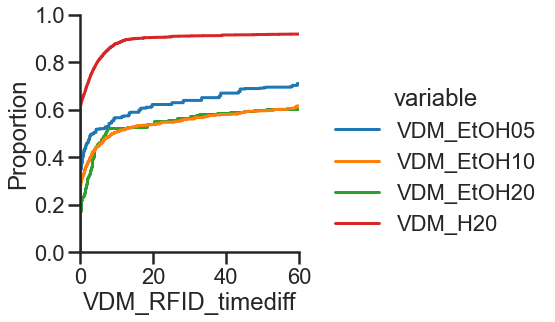

In [32]:
data_int = data_comb[data_comb['VDM_RFID_timediff'] < 6000]
sns.displot(data=data_comb, x="VDM_RFID_timediff", kind="ecdf", hue='variable')
plt.xlim(0, 60)
plt.show()

#### Add metadata

In [ ]:
data_comb = meta_data.merge(data_comb.reset_index(), left_on='IdRFID', right_on='RFID_assign_id_pre', sort=False)

print(data_comb.shape)
data_comb.head()

### Add back data from cage 1 (single mice)

#### Add back data from cage 1 (single mouse)

In [49]:
data_VDM_tidy_intake_c1 = data_VDM_tidy_intake[data_VDM_tidy_intake['Cage_VDM']==1]
print(data_VDM_tidy_intake_c1.shape)
data_VDM_tidy_intake_c1.head()

(1958, 18)


,we_switch,StartDate,Cage_VDM,Cohort,TP,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,wes_drink
0,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 02:14:04,VDM_EtOH05,0.025,2020-09-14 02:14:04,1.600050e+09,2020-09-14,14,02:14:04,2,14,4,dark_am,etoh
1,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 02:14:06,VDM_EtOH05,0.075,2020-09-14 02:14:06,1.600050e+09,2020-09-14,14,02:14:06,2,14,6,dark_am,etoh
2,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 15:02:55,VDM_EtOH05,0.075,2020-09-14 15:02:55,1.600096e+09,2020-09-14,14,15:02:55,15,2,55,light,etoh
5,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 19:55:01,VDM_EtOH05,0.025,2020-09-14 19:55:01,1.600113e+09,2020-09-14,14,19:55:01,19,55,1,dark_pm,etoh
6,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 19:55:03,VDM_EtOH05,0.025,2020-09-14 19:55:03,1.600113e+09,2020-09-14,14,19:55:03,19,55,3,dark_pm,etoh


In [50]:
data_VDM_tidy_intake_c1 = meta_data.merge(data_VDM_tidy_intake_c1, left_on=['wes_day', 'Cage'], right_on=['we_switch', 'Cage_VDM'])

print(data_VDM_tidy_intake_c1.shape)
data_VDM_tidy_intake_c1.head()

(1958, 34)


,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,IdRFID,weight_pre,weight_post,weight_diff,notes,wes_day,wd_day,r_day,we_switch,StartDate,Cage_VDM,Cohort,TP,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,wes_drink
0,etoh1,first_pilot,1,1,1,1,1027,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 02:14:04,VDM_EtOH05,0.025,2020-09-14 02:14:04,1.600050e+09,2020-09-14,14,02:14:04,2,14,4,dark_am,etoh
1,etoh1,first_pilot,1,1,1,1,1027,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 02:14:06,VDM_EtOH05,0.075,2020-09-14 02:14:06,1.600050e+09,2020-09-14,14,02:14:06,2,14,6,dark_am,etoh
2,etoh1,first_pilot,1,1,1,1,1027,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 15:02:55,VDM_EtOH05,0.075,2020-09-14 15:02:55,1.600096e+09,2020-09-14,14,15:02:55,15,2,55,light,etoh
3,etoh1,first_pilot,1,1,1,1,1027,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 19:55:01,VDM_EtOH05,0.025,2020-09-14 19:55:01,1.600113e+09,2020-09-14,14,19:55:01,19,55,1,dark_pm,etoh
4,etoh1,first_pilot,1,1,1,1,1027,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 19:55:03,VDM_EtOH05,0.025,2020-09-14 19:55:03,1.600113e+09,2020-09-14,14,19:55:03,19,55,3,dark_pm,etoh


In [51]:
data_comb = pd.concat([data_VDM_tidy_intake_c1, data_comb], axis=0)
print(data_comb.shape)
data_comb.head()

(7633, 45)


,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,IdRFID,weight_pre,weight_post,weight_diff,notes,wes_day,wd_day,r_day,we_switch,StartDate,Cage_VDM,Cohort,TP,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,wes_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld,VDM_RFID_timediff
0,etoh1,first_pilot,1.0,1.0,1.0,1.0,1027.0,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 02:14:04,VDM_EtOH05,0.025,2020-09-14 02:14:04,1.600050e+09,2020-09-14,14,02:14:04,2,14,4,dark_am,etoh,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,etoh1,first_pilot,1.0,1.0,1.0,1.0,1027.0,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 02:14:06,VDM_EtOH05,0.075,2020-09-14 02:14:06,1.600050e+09,2020-09-14,14,02:14:06,2,14,6,dark_am,etoh,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2,etoh1,first_pilot,1.0,1.0,1.0,1.0,1027.0,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 15:02:55,VDM_EtOH05,0.075,2020-09-14 15:02:55,1.600096e+09,2020-09-14,14,15:02:55,15,2,55,light,etoh,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN
3,etoh1,first_pilot,1.0,1.0,1.0,1.0,1027.0,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 19:55:01,VDM_EtOH05,0.025,2020-09-14 19:55:01,1.600113e+09,2020-09-14,14,19:55:01,19,55,1,dark_pm,etoh,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN
4,etoh1,first_pilot,1.0,1.0,1.0,1.0,1027.0,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 19:55:03,VDM_EtOH05,0.025,2020-09-14 19:55:03,1.600113e+09,2020-09-14,14,19:55:03,19,55,3,dark_pm,etoh,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN


#### Add day, hour, and min counts

In [52]:
#column of running day count
dat_map = {13: 1, 14: 2, 15: 3, 16: 4, 17: 5, 18: 6,
 21: 1, 22: 2, 23: 3, 24: 4, 25: 5,
 28: 1, 29: 2, 30: 3, 1: 4, 2: 5,
 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9:6}
data_comb['day_count'] = data_comb['VDM_day'].map(dat_map)

#column of running min and second count within each day
data_comb['min_count'] = (data_comb['VDM_hour']*60) + data_comb['VDM_min'] 
data_comb['sec_count'] = (data_comb['min_count']*60) + data_comb['VDM_second'] 

#column of running hour and minute count across all days
data_comb['hour_count_running'] = (data_comb['day_count']*24) + data_comb['VDM_hour'] - 24
data_comb['min_count_running'] = (data_comb['hour_count_running']*60) + data_comb['VDM_min'] 
data_comb['sec_count_running'] = (data_comb['min_count_running']*60) + data_comb['VDM_second'] - 60

print(data_comb.shape)
data_comb.head()

(7633, 51)


,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,IdRFID,weight_pre,weight_post,weight_diff,notes,wes_day,wd_day,r_day,we_switch,StartDate,Cage_VDM,Cohort,TP,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,wes_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld,VDM_RFID_timediff,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running
0,etoh1,first_pilot,1.0,1.0,1.0,1.0,1027.0,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 02:14:04,VDM_EtOH05,0.025,2020-09-14 02:14:04,1.600050e+09,2020-09-14,14,02:14:04,2,14,4,dark_am,etoh,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,2,134,8044,26,1574,94384
1,etoh1,first_pilot,1.0,1.0,1.0,1.0,1027.0,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 02:14:06,VDM_EtOH05,0.075,2020-09-14 02:14:06,1.600050e+09,2020-09-14,14,02:14:06,2,14,6,dark_am,etoh,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,2,134,8046,26,1574,94386
2,etoh1,first_pilot,1.0,1.0,1.0,1.0,1027.0,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 15:02:55,VDM_EtOH05,0.075,2020-09-14 15:02:55,1.600096e+09,2020-09-14,14,15:02:55,15,2,55,light,etoh,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,2,902,54175,39,2342,140515
3,etoh1,first_pilot,1.0,1.0,1.0,1.0,1027.0,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 19:55:01,VDM_EtOH05,0.025,2020-09-14 19:55:01,1.600113e+09,2020-09-14,14,19:55:01,19,55,1,dark_pm,etoh,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,2,1195,71701,43,2635,158041
4,etoh1,first_pilot,1.0,1.0,1.0,1.0,1027.0,blast,041A555768,29.4,NaN,NaN,NaN,2020-09-13 17:08:27,NaN,NaN,2020-09-13 17:08:27,200913,1,r1,1m,09/14/20 19:55:03,VDM_EtOH05,0.025,2020-09-14 19:55:03,1.600113e+09,2020-09-14,14,19:55:03,19,55,3,dark_pm,etoh,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,2,1195,71703,43,2635,158043


### Export

In [53]:
data_RFID_final.to_csv('data_RFID_final_1m_r1.csv')
data_comb.to_csv('data_comb_1m_r1.csv')